In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

def pretty_plot(df, ylabel, logy=False):
    fig = plt.figure(figsize=(10, 7))
    ax = df.plot(logy=logy, ax = plt.gca())
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=70)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.gcf().autofmt_xdate()
    return ax

In [144]:
data_start_date = dt.date(year=2020, month=3, day=2)
n_days_since_start = (dt.date.today() - data_start_date).days + 1

reference = pd.DataFrame(
    {'days_since_start': range(n_days_since_start)}, 
    index=pd.date_range(data_start_date, dt.date.today())
)

In [145]:
diagnosed = pd.read_csv('../consolidated/diagnosed.csv', index_col=0, header=0)
icu = pd.read_csv('../consolidated/icu.csv', index_col=0, header=0)
deaths = pd.read_csv('../consolidated/deaths.csv', index_col=0, header=0)

diagnosed = diagnosed.merge(reference, left_index=True, right_index=True, how='right')
icu = icu.merge(reference, left_index=True, right_index=True, how='right')
deaths = deaths.merge(reference, left_index=True, right_index=True, how='right')

most_impacted_ccaa = diagnosed.tail(1).iloc[0].sort_values(ascending=False).head(5)

In [146]:
rates = np.arange(0.2, 0.5, 0.1)
most_impacted_ccaa_name = most_impacted_ccaa.index[0]
start_point = diagnosed[most_impacted_ccaa_name].iloc[0]
growth_cols = []
for rate in rates:
    growth_col = f'{most_impacted_ccaa_name} {(rate*100):.0f}% DoD growth'
    diagnosed[growth_col] = start_point * np.power(1 + rate, diagnosed['days_since_start'])
    growth_cols.append(growth_col)

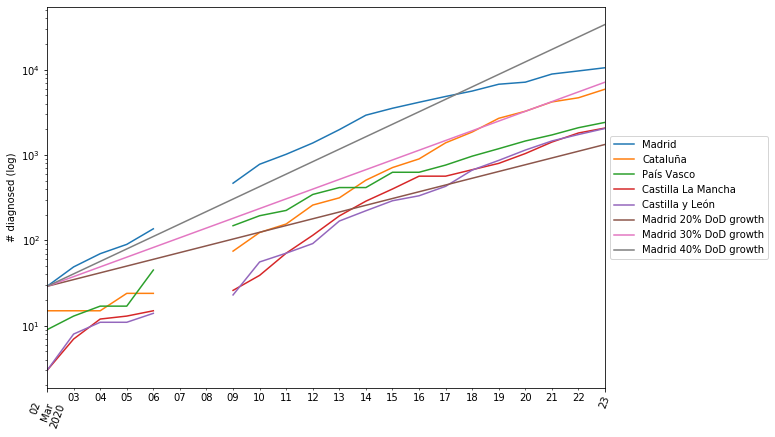

In [147]:
to_plot = most_impacted_ccaa.index.tolist() + growth_cols
ax = pretty_plot(diagnosed[to_plot], '# diagnosed (log)', logy=True)

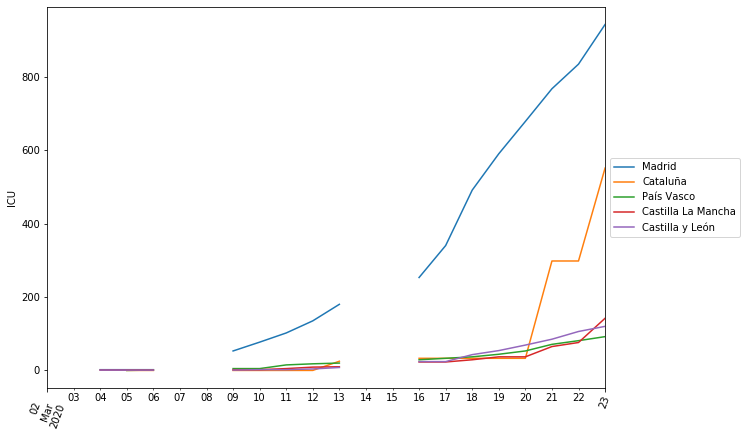

In [149]:
pretty_plot(icu[most_impacted_ccaa.index], 'ICU')

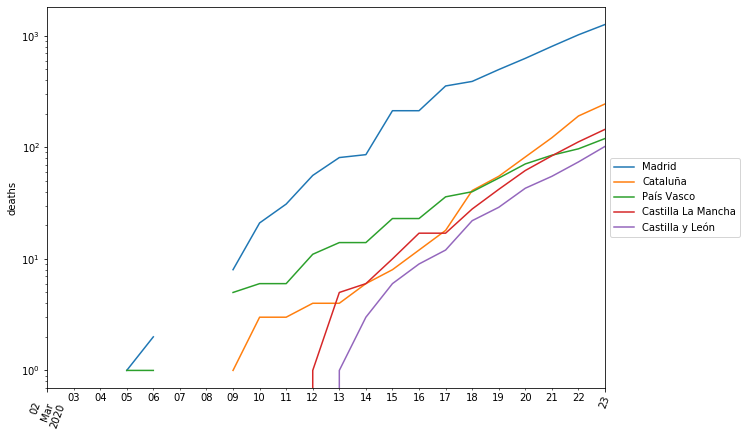

In [150]:
pretty_plot(deaths[most_impacted_ccaa.index], 'deaths', logy=True)